In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from matplotlib import cm
from scipy.ndimage import gaussian_filter

In [2]:
# load the data including pressure and vecter fields of each point
# calculated and exported by COMSOL Multiphysics
#gridc.cod;uf_h.dat;vf_h.dat
#name=[Roc,Shelter,ADMS,prime,prime_roc]
#asp=[111,112]
#name='prime_roc'; asp=112
#df_x = 'output/gridc.cod'; df_x=df_x.format(name,asp)
#df_y = 'output/gridc.cod'; df_y=df_y.format(name,asp)
#df_z = 'output/gridc.cod'; df_z=df_z.format(name,asp)
#uf_h = 'output/uf_h.dat';  uf_h=uf_h.format(name,asp)
#vf_h = 'output/vf_h.dat';  vf_h=vf_h.format(name,asp)

#df_x = pd.read_csv(df_x, header=None,delim_whitespace=False,skiprows=1,  nrows=100 )
#df_y = pd.read_csv(df_y, header=None,delim_whitespace=False,skiprows=102,nrows=50 )
#df_z = pd.read_csv(df_z, header=None,delim_whitespace=False,skiprows=153,nrows=20  )
#uf_h = pd.read_csv(uf_h, header=None,delim_whitespace=False)#,skiprows=5,  nrows=5000)
#vf_h = pd.read_csv(vf_h, header=None,delim_whitespace=False)#,skiprows=60005,  nrows=5000)

In [7]:
# load the data including pressure and vector fields of each point
# calculated and exported by COMSOL Multiphysics
# gridc.cod; uf_h.dat; vf_h.dat
# name=[Roc, Shelter, ADMS, prime, prime_roc]
# asp=[111, 112]
name = 'prime_roc'
asp = 111

# Set file paths
df_x = 'output/gridc.cod'
df_y = 'output/gridc.cod'
df_z = 'output/gridc.cod'
uf_h = 'output/uf_h.dat'
vf_h = 'output/vf_h.dat'

# Load the data
df_x = pd.read_csv(df_x, header=None, sep=r'\s+', skiprows=1, nrows=300)
df_y = pd.read_csv(df_y, header=None, sep=r'\s+', skiprows=302, nrows=200)
df_z = pd.read_csv(df_z, header=None, sep=r'\s+', skiprows=503, nrows=80)
#uf_h = pd.read_csv(uf_h, header=None, sep=r'\s+')  # , skiprows=5, nrows=5000)
#vf_h = pd.read_csv(vf_h, header=None, sep=r'\s+')  # , skiprows=60005, nrows=5000)
uf_h = pd.read_csv(uf_h, header=None,delim_whitespace=False,skiprows=0,  nrows=60000)
vf_h = pd.read_csv(vf_h, header=None,delim_whitespace=False,skiprows=0,  nrows=60000)

/var/folders/9_/yhxk9lyd3q14lqgvhpgknhxc0000gn/T/ipykernel_88841/1468545707.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  uf_h = pd.read_csv(uf_h, header=None,delim_whitespace=False,skiprows=0,  nrows=60000)
/var/folders/9_/yhxk9lyd3q14lqgvhpgknhxc0000gn/T/ipykernel_88841/1468545707.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  vf_h = pd.read_csv(vf_h, header=None,delim_whitespace=False,skiprows=0,  nrows=60000)


In [8]:
# NumPy配列として出力する場合
print("df_x:")


print(np.array(df_x))

print("df_y:")
print(np.array(df_y))

df_x:
[[-104.75]
 [-104.25]
 [-103.75]
 [-103.25]
 [-102.75]
 [-102.25]
 [-101.75]
 [-101.25]
 [-100.75]
 [-100.25]
 [ -99.75]
 [ -99.25]
 [ -98.75]
 [ -98.25]
 [ -97.75]
 [ -97.25]
 [ -96.75]
 [ -96.25]
 [ -95.75]
 [ -95.25]
 [ -94.75]
 [ -94.25]
 [ -93.75]
 [ -93.25]
 [ -92.75]
 [ -92.25]
 [ -91.75]
 [ -91.25]
 [ -90.75]
 [ -90.25]
 [ -89.75]
 [ -89.25]
 [ -88.75]
 [ -88.25]
 [ -87.75]
 [ -87.25]
 [ -86.75]
 [ -86.25]
 [ -85.75]
 [ -85.25]
 [ -84.75]
 [ -84.25]
 [ -83.75]
 [ -83.25]
 [ -82.75]
 [ -82.25]
 [ -81.75]
 [ -81.25]
 [ -80.75]
 [ -80.25]
 [ -79.75]
 [ -79.25]
 [ -78.75]
 [ -78.25]
 [ -77.75]
 [ -77.25]
 [ -76.75]
 [ -76.25]
 [ -75.75]
 [ -75.25]
 [ -74.75]
 [ -74.25]
 [ -73.75]
 [ -73.25]
 [ -72.75]
 [ -72.25]
 [ -71.75]
 [ -71.25]
 [ -70.75]
 [ -70.25]
 [ -69.75]
 [ -69.25]
 [ -68.75]
 [ -68.25]
 [ -67.75]
 [ -67.25]
 [ -66.75]
 [ -66.25]
 [ -65.75]
 [ -65.25]
 [ -64.75]
 [ -64.25]
 [ -63.75]
 [ -63.25]
 [ -62.75]
 [ -62.25]
 [ -61.75]
 [ -61.25]
 [ -60.75]
 [ -60.25]
 [ -

In [9]:
## 定義域[-1, 1]のx, yを各区切りで生成
#x = np.linspace(-0.177000001,  0.416999996,100)
#y = np.linspace(-0.207000002,  0.207000002, 70)
#z = np.linspace(3.00000003E-03,0.476999998, 80)
#df_x=[]; df_z=[]
## メッシュグリッドを生成
#xv, zv = np.meshgrid(x, z)
#for xx,zz in zip(xv, zv):
#    for x,z in zip(xx, zz):
#        df_x.extend([x])
#        df_z.extend([z])
#df_x; df_z; uf_v; wf_v

In [10]:
width=1 #箱の長さ(9)*10/df_x
x=np.array(df_x)*width
y=np.array(df_y)*width
u=np.array(uf_h)
v=np.array(vf_h)
#aveu=sum(u)/len(u)
#avev=sum(abs(v))/len(v)
#print(len(x),len(y),len(u),len(v))
print(x.shape,y.shape,u.shape,v.shape)
#print(max(u),min(u), aveu, max(v), min(v), avev)

(300, 1) (200, 1) (60000, 1) (60000, 1)


In [11]:
# the lines and rows of the input array
#xlen = int(x.shape[0]**0.5)
#zlen = int(z.shape[0]**0.5)
#print(xlen,zlen)
xlen=x.shape[0]
ylen=y.shape[0]
print(xlen,ylen)

300 200


In [12]:
# make unique array from mesh-gridded input array
x_row = x[: xlen] #-1
y_row = y[: ylen]
#print(x_row);print(y_row)
print(x_row.shape, y_row.shape)

(300, 1) (200, 1)


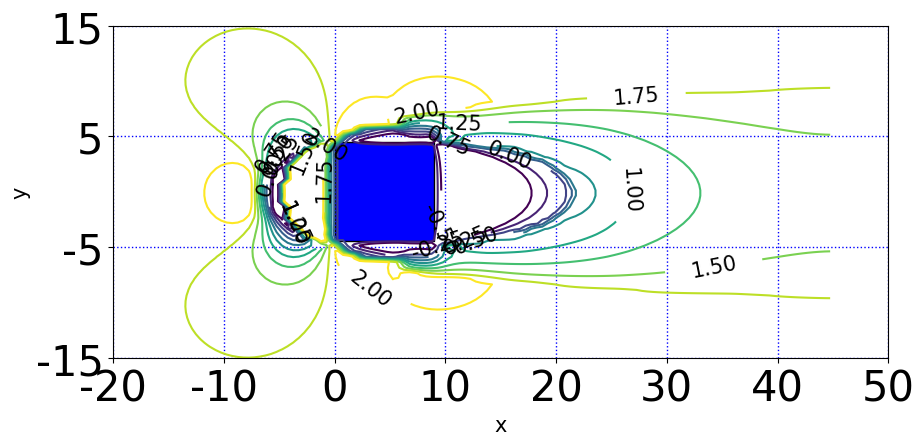

In [14]:
# limit the range of the data
sigma = 0.0 # this depends on how noisy your data is, play with it!
XX,YY = np.meshgrid(x_row,y_row)
cont_u = uf_h.values.reshape(ylen,xlen)
cont_u = np.array(cont_u)
cont_ug = gaussian_filter(cont_u, sigma)
cont_v = vf_h.values.reshape(ylen,xlen)
cont_v = np.array(cont_v)
cont_vg = gaussian_filter(cont_v, sigma)
minvel=-0.5
maxvel=+2.00
dev=5

#plt.rcParams['xtick.direction'] = 'in'#軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams['ytick.direction'] = 'in'#軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')

fig = plt.figure(facecolor="w",figsize=(10,10))
ax = plt.axes()
ax.set_aspect('equal')

# plot the u_velocity data
cont_cl=plt.contour(XX, YY, cont_ug, 
                    np.linspace(minvel,maxvel,11), cmap='viridis') # cmap=cm.jet, colors="black"
plt.clabel(cont_cl, fmt='%1.2f', inline=True, inline_spacing=0.01, fontsize=15, colors="black")

# draw the obstacle
rectangle = patches.Rectangle(xy=(0.0,-4.5), width=9.0, height=9.0, 
                              edgecolor='black', facecolor='blue', fill=True)
ax.add_patch(rectangle)

# # set aspect ratio to equal
# #plt.axes().set_aspect('equal')
# #plt.axis([-2.5, 5.5, -2, 2]) # [min_x,max_x,  min_y,max_y]
plt.axis([-20, 50, -15, 15]) # [min_x,max_x,  min_y,max_y]
# #plt.xlim(0,5) # [[min_x,max_x]
# #plt.ylim(0,3) # [min_x,max_x]
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))#x軸小数点以下0桁表示
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))#y軸小数点以下0桁表示
plt.grid(color='b', linestyle='dotted', linewidth=1)
plt.xticks( np.arange(-20, 50.01, 10) )
plt.yticks( np.arange(-15, 15.01, 10) )
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# # adjust colorbar
#fig_coord = [0.93,0.25,0.01,0.5]
#cbar_ax = fig.add_axes(fig_coord)
#cbar = plt.colorbar(cax=cbar_ax)
#cbar.set_ticks(np.linspace(minvel,maxvel,dev))
#cbar.set_ticklabels(np.linspace(minvel,maxvel,dev))
#ticklabs = cbar.ax.get_yticklabels()
#cbar.ax.set_yticklabels(ticklabs,ha='right', fontsize=15)
#cbar.ax.yaxis.set_tick_params(pad=35)  # your number may vary
#cbar.set_label("wind-velocity u (m/s)", fontsize=15)
# #
 # figname_b='wang_{0}_{1}_cont_h.png'
# figname=figname_b.format(name,asp)
# plt.savefig(figname,bbox_inches="tight",pad_inches=0.02,dpi=250)
#plt.savefig('contour daiagram.png', format='png')
plt.show()

ValueError: Starting point (-12.5, -15.0) outside of data boundaries

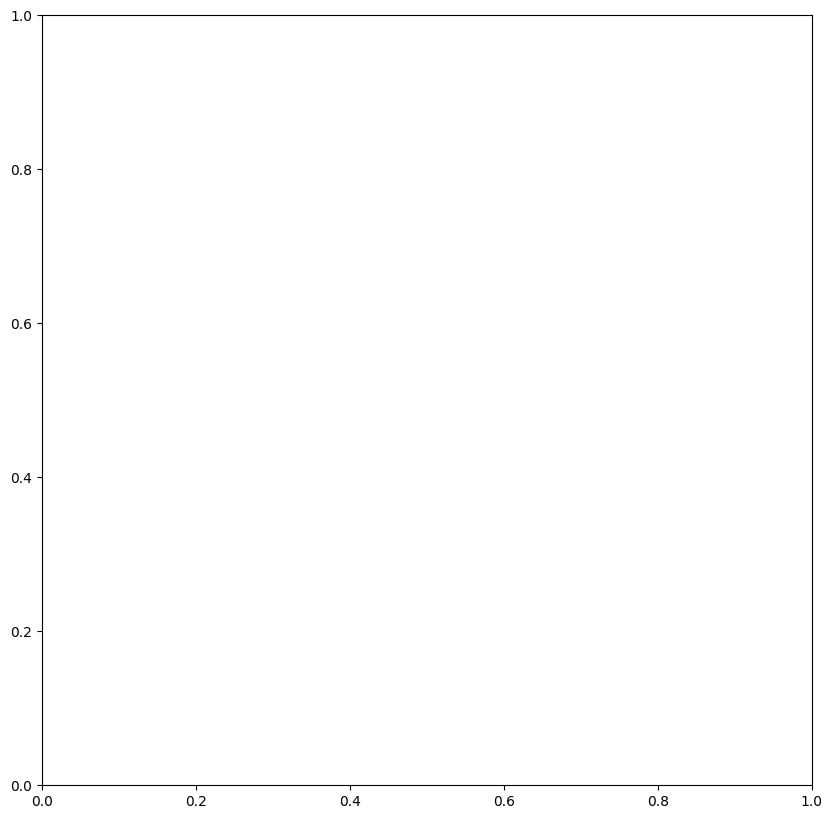

In [64]:
# plot the u_velocity data
fig = plt.figure(facecolor="w",figsize=(10,10))
ax = fig.add_subplot(111)
#ax1 = plt.axes()
ax.set_aspect('equal')

speed=(cont_u**2+cont_v**2)**0.5
minvel=0.0
maxvel=+5.0
dev=5
label_val=np.linspace(minvel,maxvel,dev)
label_val=np.round(label_val, decimals=2)
ng=100;dens=80; x1=[-12.5, -9.8, -4.8, -0.7, 4.5, 10.465, 10.47, 22.5]

for a in x1:
    x1 = [a for i in range(ng)]
    y1 = np.linspace(-15,15,ng)

    seed_points =np.array([x1,y1])
    #add legend of Speed
#    strm=plt.streamplot(XX, YY, cont_u, cont_v, density=dens, linewidth=1, 
#                        color=speed, cmap='viridis', norm=None,
#                        arrowstyle='-',maxlength=50.0, 
#                        start_points=seed_points.T,integration_direction='both')
    # no legend
    strm=plt.streamplot(XX, YY, cont_u, cont_v, density=dens, linewidth=1, 
                        color='black', norm=None,
                        arrowstyle='-',maxlength=50.0, 
                        start_points=seed_points.T,integration_direction='both')

# plt.streamplot(x, y, u, v, density=1, linewidth=None, 
#                              color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', 
#                              minlength=0.1, transform=None, zorder=None, start_points=None, 
#                              maxlength=4.0, integration_direction='both', data=None)
    # draw the obstacle

# draw an obstacle
rectangle = patches.Rectangle(xy=(0.0,-4.5), width=9.0, height=9.0, 
                              edgecolor='black', facecolor='gray', fill=True)
ax.add_patch(rectangle)

# set aspect ratio to equal
#plt.axes().set_aspect("equal")
plt.axis([-10, 25, -15, 15]) # [min_x,max_x,  min_y,max_y]
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#x軸小数点以下0桁表示
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#y軸小数点以下0桁表示
plt.grid(color='b', linestyle='dotted', linewidth=1)
plt.xticks( np.arange(-10, 25.01, 10.) )
plt.yticks( np.arange(-15, 15.01, 10.) )
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

## adjust colorbar
#fig_coord = [0.91,0.1,0.01,0.80]
#cbar_ax = fig.add_axes(fig_coord)
#cbar = plt.colorbar(cax=cbar_ax)
#cbar_ax.set_ylim(minvel,maxvel)
#cbar.set_ticks(label_val)
#cbar.set_ticklabels(label_val)
#ticklabs = cbar.ax.get_yticklabels()
##cbar.ax.set_yticklabels(ticklabs,ha='right')
#cbar.ax.yaxis.set_tick_params(pad=10)  # your number may vary
#cbar.set_label("Speed [m/s]")

# figname_b='wang_{0}_{1}_stream_h.png'
# figname=figname_b.format(name,asp)
# plt.savefig(figname,bbox_inches="tight",pad_inches=0.02,dpi=250)
#plt.savefig('streamline diagram.png', format='png')
plt.show()

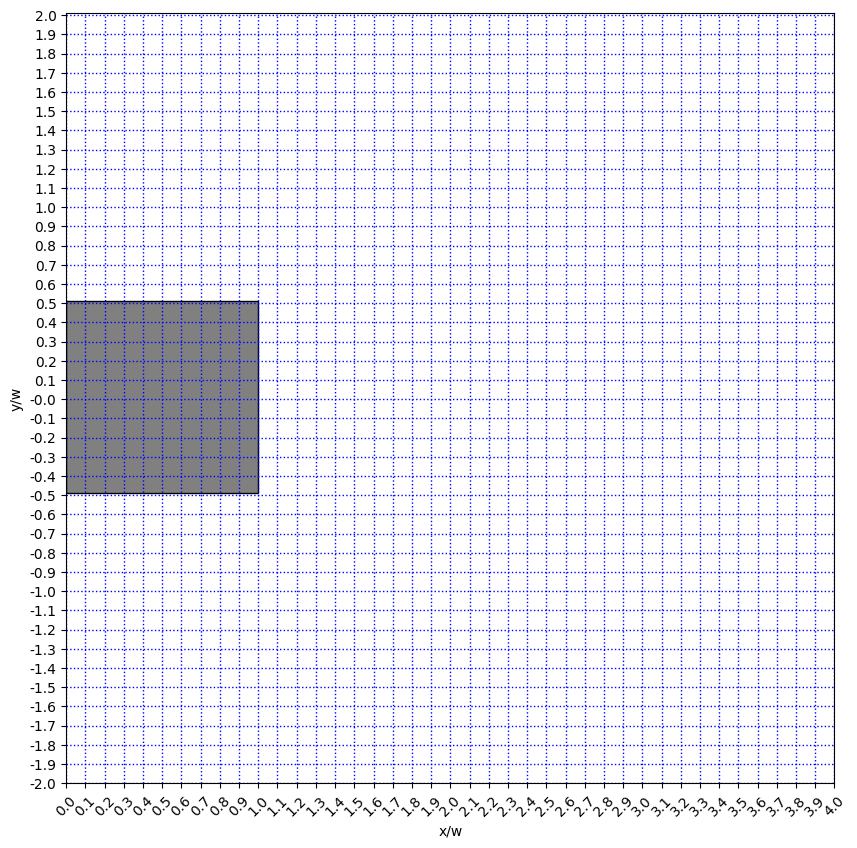

In [12]:
# plot the u_velocity data
fig = plt.figure(facecolor="w",figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

speed=(cont_u**2+cont_v**2)**0.5
minvel=0.0
maxvel=1.15
dev=3
label_val=np.linspace(minvel,maxvel,dev)
label_val=np.round(label_val, decimals=2)
#label_val=np.linspace(minvel,maxvel,dev)
#label_val=[0,0.2,0.4,0.6,0.8,1.0,1.2]

#x1=[-2, -0.5, 0.5, 1.18, 1.19, 1.2, 2.5]
#ng=80;dens=40; x1=[0.5, 1.25, 2.25]  #Roc     1:1:1
#ng=80;dens=40; x1=[0.5, 1.15, 2.45]  #Shelter 1:1:1
#ng=80;dens=40; x1=[0.5, 1.23, 2.08]  #ADMS 1:1:1
#ng=40;dens=80; x1=[0, 0.5, 1.25, 1.6, 3]  #prime   1:1:1
#ng=80;dens=40; x1=[0.5, 1.25, 2.18]  #prime_roc   1:1:1
ng=80;dens=40; x1=[0.5, 1.24, 2.55]    #Roc     1:1:2
#ng=80;dens=40; x1=[0.5, 1.25, 2.55]    #Shelter 1:1:2
#ng=80;dens=40; x1=[0.5, 1.25, 2.40]  #ADMS    1:1:2
#ng=60;dens=80; x1=[0, 0.5, 1.25, 1.8, 3]   #prime  1:1:2
#ng=80;dens=40; x1=[0.5, 1.45, 2.12]  #prime_roc   1:1:2
#ng=60;dens=80; x1=[1.35,1.8]  #test
for a in x1:
    x1 = [a for i in range(ng)]
    y1 = np.linspace(-2,2,ng)
    seed_points =np.array([x1,y1])
    #add legend of Speed
#    strm=plt.streamplot(XX, YY, cont_u, cont_v, density=dens, linewidth=1, 
#                        color=speed, cmap='viridis', norm=None,
#                        arrowstyle='-',maxlength=50.0, 
#                        start_points=seed_points.T,integration_direction='both')
    # no legend
    strm=plt.streamplot(XX, YY, cont_u, cont_v, density=dens, linewidth=1, 
                        color='black', norm=None,
                        arrowstyle='-',maxlength=50.0, 
                        start_points=seed_points.T,integration_direction='both')

    #matplotlib.pyplot.streamplot(x, y, u, v, density=1, linewidth=None, 
    #  color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', 
    #  minlength=0.1, transform=None, zorder=None, start_points=None, 
    #  maxlength=4.0, integration_direction='both', *, data=None)
    # draw the obstacle

# draw an obstacle
rectangle = patches.Rectangle(xy=(0.0,-0.5), width=1.0, height=1.0, 
                              edgecolor='black', facecolor='gray', fill=True)
ax.add_patch(rectangle)

plt.axis([0.0, 4, -2, 2]) # [min_x,max_x,  min_y,max_y]
plt.xlabel('x/w')
plt.ylabel('y/w')
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#x軸小数点以下0桁表示
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#y軸小数点以下0桁表示
plt.grid(color='b', linestyle='dotted', linewidth=1)
plt.xticks( np.arange(0, 4.01, 0.1), rotation=45)
plt.yticks( np.arange(-2.01, 2.01, 0.1) )


figname_b='wang_{0}_{1}_stream_h_0.1mesh.png'
figname=figname_b.format(name,asp)
plt.savefig(figname,bbox_inches="tight",pad_inches=0.02,dpi=250)